In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')

import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

import torch

from src.config import SEED, DEVICE
from src.utils.random import set_seed
from src.utils.visualisations import plot_pre_post_mask
from src.utils.segmentation_train import get_dataloaders
from src.siamese_unet_conc.siamese_unet_conc_train import get_model

DATA_PATH = '../data/'
MODELS_PATH = f'{DATA_PATH}models/'
BATCH_SIZE = 1

set_seed(SEED)

In [ ]:
model_save_dict = f'{MODELS_PATH}siameseunetconc/'
model_save_path = sorted(os.listdir(model_save_dict))[-1]
model_save_path = f'{model_save_dict}{model_save_path}'
model = get_model()
model.load_state_dict(torch.load(model_save_path))
model.eval()

train_loader, val_loader, test_loader = get_dataloaders(BATCH_SIZE)

In [ ]:
# Load validation example
train_loader, val_loader, test_loader = get_dataloaders(BATCH_SIZE)
it = iter(test_loader)
pres, posts, masks, labels = next(it)

pre = pres[0].unsqueeze(0).to(DEVICE)
post = posts[0].unsqueeze(0).to(DEVICE)
mask = masks[0].cpu()
label = labels[0]

# Get Prediction
pred = model(pre, post).squeeze()
pred = torch.nn.Sigmoid()(pred).cpu().detach()
pred = (pred > 0.5).float()

# Plot example
pre = pre.squeeze(0).cpu().detach()
post = post.squeeze(0).cpu().detach()
print(pre.shape, post.shape, mask.shape, label.shape, pred.shape)
plot_pre_post_mask(pre, post, mask, label, pred=pred, is_normalised=True)

In [15]:
import sys
sys.path.append('../')

import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

import torch

from src.models.unet import UNet
from src.config import SEED, DEVICE
from src.utils.random import set_seed
from src.utils.visualisations import plot_pre_post_mask
from src.siamese_unet_conc.siamese_unet_conc_train import get_model
from src.utils.segmentation_train import get_dataloaders

DATA_PATH = '../data/'
MODELS_PATH = f'{DATA_PATH}models/'
BATCH_SIZE = 1

set_seed(SEED)

✅ Train dataloader length: 266
✅ Test dataloader length: 56
✅ Val dataloader length: 58
torch.Size([3, 1024, 1024]) torch.Size([3, 1024, 1024]) torch.Size([1024, 1024]) torch.Size([]) torch.Size([1024, 1024])


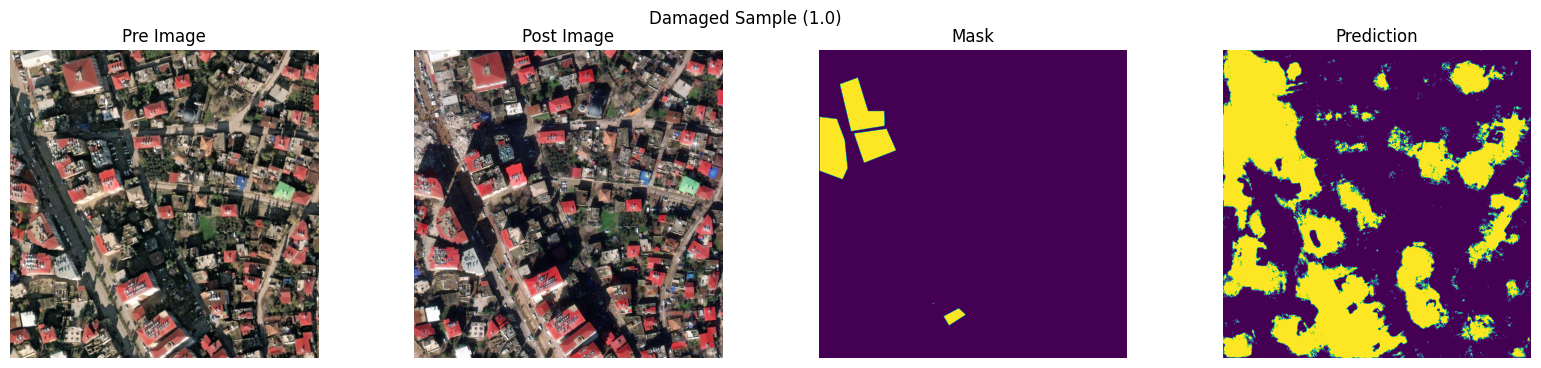

In [28]:
# Load validation example
train_loader, val_loader, test_loader = get_dataloaders(BATCH_SIZE)
it = iter(test_loader)
pres, posts, masks, labels = next(it)

pre = pres[0].unsqueeze(0).to(DEVICE)
post = posts[0].unsqueeze(0).to(DEVICE)
mask = masks[0].cpu()
label = labels[0]

# Get Prediction
pred = model(pre, post).squeeze()
pred = torch.nn.Sigmoid()(pred).cpu().detach()
pred = (pred > 0.5).float()

# Plot example
pre = pre.squeeze(0).cpu().detach()
post = post.squeeze(0).cpu().detach()
print(pre.shape, post.shape, mask.shape, label.shape, pred.shape)
plot_pre_post_mask(pre, post, mask, label, pred=pred, is_normalised=True)